In [1]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import utils as utils
import model as model
from model import (
    model_0,
    model_1,
    model_1_4,
    model_2,
    model_3,
    model_summary,
    model_train,
    model_test,
)

### Model_0

In [2]:
device = "cpu"
my_model = model_0().to(device)
model_summary(my_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         MaxPool2d-3           [-1, 16, 13, 13]               0
            Conv2d-4           [-1, 16, 11, 11]           2,304
              ReLU-5           [-1, 16, 11, 11]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7             [-1, 16, 3, 3]           2,304
              ReLU-8             [-1, 16, 3, 3]               0
            Conv2d-9             [-1, 16, 1, 1]           2,304
             ReLU-10             [-1, 16, 1, 1]               0
           Linear-11                   [-1, 10]             170
             ReLU-12                   [-1, 10]               0
Total params: 7,226
Trainable params: 7,226
Non-trainable params: 0
-----------------------------------

In [3]:
# CUDA?
#cuda = torch.cuda.is_available()
#print("CUDA Available?", cuda)

##### Download the training and the test data

In [2]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=model.train_transforms())
test_data = datasets.MNIST('../data', train=False, download=True, transform=model.test_transforms())

##### Build the dataloaders

In [3]:
batch_size = 512

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

##### Look at some of the data

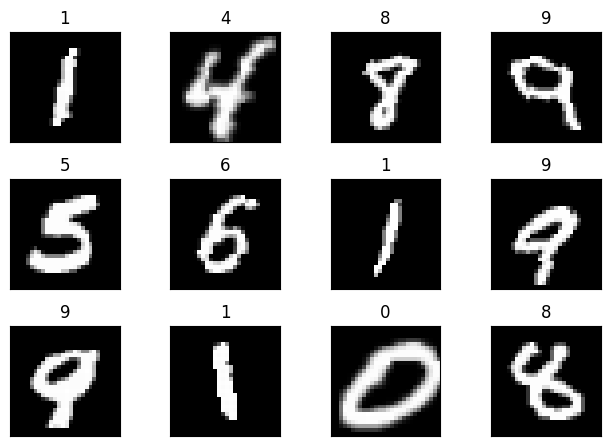

In [4]:
utils.return_dataset_images(train_loader, 12)

##### Initialize variables to use in making plots later on

In [5]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [8]:
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = model_train(my_model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
    test_acc, test_losses = model_test(my_model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.6405 Batch_id=117 Accuracy=58.60: 100%|█| 118/118 [00:


Test set: Average loss: 0.5973, Accuracy: 7681/10000 (76.81%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.2941 Batch_id=117 Accuracy=82.47: 100%|█| 118/118 [00:


Test set: Average loss: 0.3440, Accuracy: 8726/10000 (87.26%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.2801 Batch_id=117 Accuracy=87.96: 100%|█| 118/118 [00:


Test set: Average loss: 0.2995, Accuracy: 8835/10000 (88.35%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.1361 Batch_id=117 Accuracy=88.30: 100%|█| 118/118 [00:


Test set: Average loss: 0.2938, Accuracy: 8841/10000 (88.41%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.2664 Batch_id=117 Accuracy=88.54: 100%|█| 118/118 [00:


Test set: Average loss: 0.2864, Accuracy: 8858/10000 (88.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1378 Batch_id=117 Accuracy=89.20: 100%|█| 118/118 [00:


Test set: Average loss: 0.2693, Accuracy: 8898/10000 (88.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.2053 Batch_id=117 Accuracy=89.28: 100%|█| 118/118 [00:


Test set: Average loss: 0.2686, Accuracy: 8905/10000 (89.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1322 Batch_id=117 Accuracy=89.27: 100%|█| 118/118 [00:


Test set: Average loss: 0.2676, Accuracy: 8900/10000 (89.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.3414 Batch_id=117 Accuracy=89.32: 100%|█| 118/118 [00:


Test set: Average loss: 0.2683, Accuracy: 8904/10000 (89.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.2207 Batch_id=117 Accuracy=89.33: 100%|█| 118/118 [00:


Test set: Average loss: 0.2687, Accuracy: 8899/10000 (88.99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.1874 Batch_id=117 Accuracy=89.38: 100%|█| 118/118 [00:


Test set: Average loss: 0.2675, Accuracy: 8905/10000 (89.05%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.2238 Batch_id=117 Accuracy=89.40: 100%|█| 118/118 [00:


Test set: Average loss: 0.2673, Accuracy: 8904/10000 (89.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.2677 Batch_id=117 Accuracy=89.40: 100%|█| 118/118 [00:


Test set: Average loss: 0.2672, Accuracy: 8904/10000 (89.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.2900 Batch_id=117 Accuracy=89.39: 100%|█| 118/118 [00:


Test set: Average loss: 0.2673, Accuracy: 8905/10000 (89.05%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.2511 Batch_id=117 Accuracy=89.39: 100%|█| 118/118 [00:


Test set: Average loss: 0.2673, Accuracy: 8903/10000 (89.03%)

Adjusting learning rate of group 0 to 1.0000e-04.


## Summary
#### Base model: model_0
- Target:  get the basic structure, a model that predicts something.
-  Started with one conv block and then a fully connected layer,
-  realized adding conv reduces number of parameters
-  while increasing what the model learns. Kept adding conv blocks until close to 8000 parameters
- Only this in augmentation: transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)),
#### Results:
- Parameters: 7,226, best train accuracy: 89.39. best test accuracy: 89.03

##### Analysis:
- Model is small, works.
- Train accuracy is higher than test, hint of over fitting


# Model_1
- Target:  Improve on the test accuracy
- Started with adding Batchnorm to one layer, saw improvement, so kept adding to other layers.

In [6]:
device = "cpu"
my_model = model_1().to(device)
model_summary(my_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         MaxPool2d-3           [-1, 16, 13, 13]               0
       BatchNorm2d-4           [-1, 16, 13, 13]              32
            Conv2d-5           [-1, 16, 11, 11]           2,304
              ReLU-6           [-1, 16, 11, 11]               0
         MaxPool2d-7             [-1, 16, 5, 5]               0
       BatchNorm2d-8             [-1, 16, 5, 5]              32
            Conv2d-9             [-1, 16, 3, 3]           2,304
             ReLU-10             [-1, 16, 3, 3]               0
           Conv2d-11             [-1, 16, 1, 1]           2,304
             ReLU-12             [-1, 16, 1, 1]               0
      BatchNorm2d-13             [-1, 16, 1, 1]              32
           Linear-14                   

##### Train a model

In [9]:
optimizer = optim.SGD(my_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = model_train(my_model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
    test_acc, test_losses = model_test(my_model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1185 Batch_id=117 Accuracy=86.65: 100%|█| 1


Test set: Average loss: 0.1450, Accuracy: 9723/10000 (97.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0730 Batch_id=117 Accuracy=97.58: 100%|█| 1


Test set: Average loss: 0.0806, Accuracy: 9821/10000 (98.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0658 Batch_id=117 Accuracy=98.33: 100%|█| 1


Test set: Average loss: 0.0594, Accuracy: 9842/10000 (98.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0406 Batch_id=117 Accuracy=98.63: 100%|█| 1


Test set: Average loss: 0.0517, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0294 Batch_id=117 Accuracy=98.87: 100%|█| 1


Test set: Average loss: 0.0445, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0233 Batch_id=117 Accuracy=99.00: 100%|█| 1


Test set: Average loss: 0.0428, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0547 Batch_id=117 Accuracy=99.12: 100%|█| 1


Test set: Average loss: 0.0413, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0248 Batch_id=117 Accuracy=99.21: 100%|█| 1


Test set: Average loss: 0.0399, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0617 Batch_id=117 Accuracy=99.28: 100%|█| 1


Test set: Average loss: 0.0359, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0109 Batch_id=117 Accuracy=99.35: 100%|█| 1


Test set: Average loss: 0.0357, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0423 Batch_id=117 Accuracy=99.45: 100%|█| 1


Test set: Average loss: 0.0352, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0338 Batch_id=117 Accuracy=99.49: 100%|█| 1


Test set: Average loss: 0.0358, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0096 Batch_id=117 Accuracy=99.56: 100%|█| 1


Test set: Average loss: 0.0348, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0219 Batch_id=117 Accuracy=99.60: 100%|█| 1


Test set: Average loss: 0.0379, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0177 Batch_id=117 Accuracy=99.62: 100%|█| 1


Test set: Average loss: 0.0342, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-03.


##### Visualize the training performance 

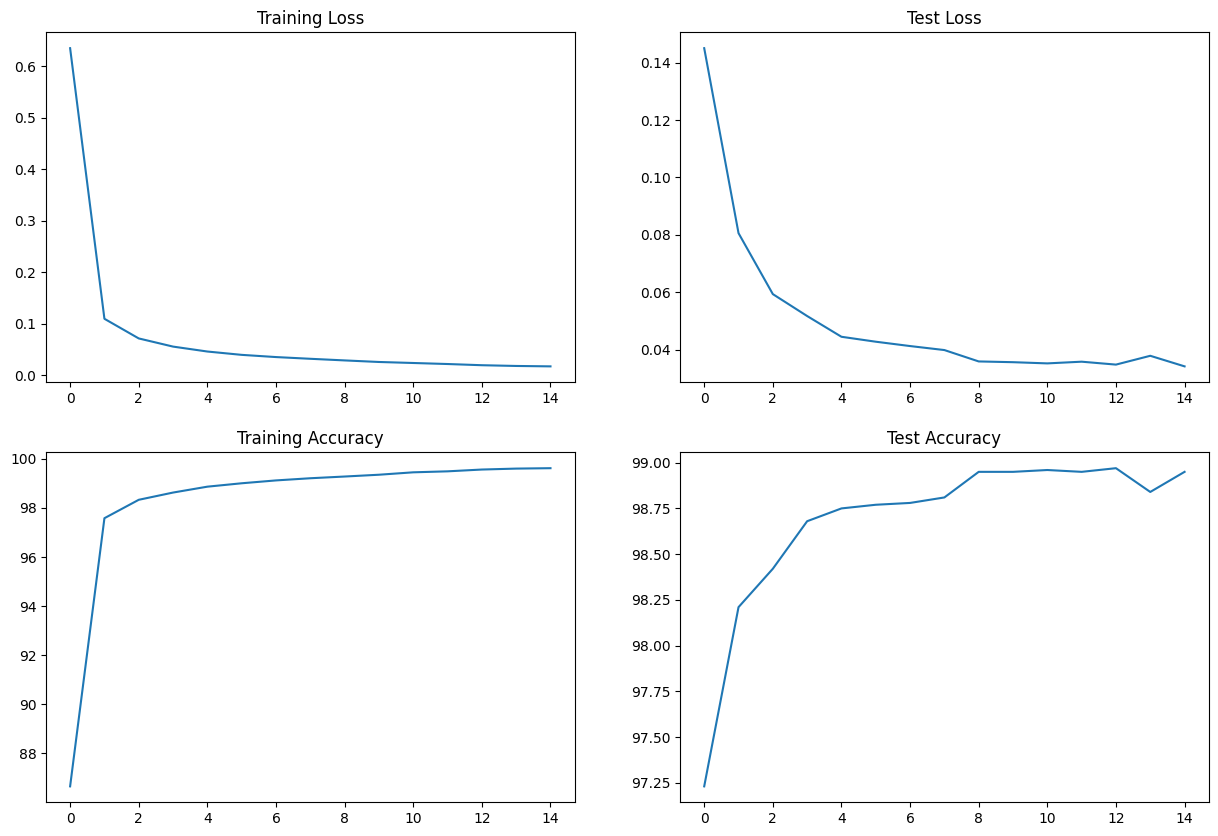

In [10]:
utils.plot_losses_accuracies(train_acc, train_losses, test_acc, test_losses,)

###  model: model_1
- Target:  Improve on the test accuracy
- Started with adding Batchnorm to one layer, saw improvement, so kept adding to other layers.

#### Results:
- Parameters: 7,322, best train accuracy: 99.62. best test accuracy: 98.95


#### Analysis:
- Model is small, overfits, needs regularization.

# Model 2
- Target:  Reduce over fitting and improve test accuracy
- Started with adding Dropout to one layer, saw improvement, so kept adding to other layers.

In [7]:
device = "cpu"
my_model = model_2().to(device)
model_summary(my_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         MaxPool2d-3           [-1, 16, 13, 13]               0
       BatchNorm2d-4           [-1, 16, 13, 13]              32
           Dropout-5           [-1, 16, 13, 13]               0
            Conv2d-6           [-1, 16, 11, 11]           2,304
              ReLU-7           [-1, 16, 11, 11]               0
         MaxPool2d-8             [-1, 16, 5, 5]               0
       BatchNorm2d-9             [-1, 16, 5, 5]              32
           Conv2d-10             [-1, 16, 3, 3]           2,304
             ReLU-11             [-1, 16, 3, 3]               0
           Conv2d-12             [-1, 16, 1, 1]           2,304
             ReLU-13             [-1, 16, 1, 1]               0
      BatchNorm2d-14             [-1, 1

### Train a model

In [8]:
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = model_train(my_model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
    test_acc, test_losses = model_test(my_model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0957 Batch_id=117 Accuracy=92.97: 100%|█| 1


Test set: Average loss: 0.0647, Accuracy: 9787/10000 (97.87%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.0326 Batch_id=117 Accuracy=98.23: 100%|█| 1


Test set: Average loss: 0.0508, Accuracy: 9829/10000 (98.29%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.0226 Batch_id=117 Accuracy=98.68: 100%|█| 1


Test set: Average loss: 0.0364, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.0141 Batch_id=117 Accuracy=98.85: 100%|█| 1


Test set: Average loss: 0.0403, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.0440 Batch_id=117 Accuracy=98.99: 100%|█| 1


Test set: Average loss: 0.0361, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0217 Batch_id=117 Accuracy=99.30: 100%|█| 1


Test set: Average loss: 0.0295, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0098 Batch_id=117 Accuracy=99.37: 100%|█| 1


Test set: Average loss: 0.0283, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0069 Batch_id=117 Accuracy=99.42: 100%|█| 1


Test set: Average loss: 0.0291, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0135 Batch_id=117 Accuracy=99.40: 100%|█| 1


Test set: Average loss: 0.0286, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0017 Batch_id=117 Accuracy=99.44: 100%|█| 1


Test set: Average loss: 0.0291, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0128 Batch_id=117 Accuracy=99.45: 100%|█| 1


Test set: Average loss: 0.0289, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.1155 Batch_id=117 Accuracy=99.42: 100%|█| 1


Test set: Average loss: 0.0286, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0124 Batch_id=117 Accuracy=99.44: 100%|█| 1


Test set: Average loss: 0.0284, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0116 Batch_id=117 Accuracy=99.47: 100%|█| 1


Test set: Average loss: 0.0290, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0299 Batch_id=117 Accuracy=99.49: 100%|█| 1


Test set: Average loss: 0.0286, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-04.


#### Results:
- Parameters: 7,322, best train accuracy: 99.49. best test accuracy: 99.13


#### Analysis:
- Reduced over fitting Need to increase model complexity

# model_3
- Target:  Improve accuracy,
- Added FC layers at the tail end

In [6]:
device = "cpu"
my_model = model_3().to(device)
model_summary(my_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         MaxPool2d-3           [-1, 16, 13, 13]               0
       BatchNorm2d-4           [-1, 16, 13, 13]              32
           Dropout-5           [-1, 16, 13, 13]               0
            Conv2d-6           [-1, 16, 11, 11]           2,304
              ReLU-7           [-1, 16, 11, 11]               0
         MaxPool2d-8             [-1, 16, 5, 5]               0
       BatchNorm2d-9             [-1, 16, 5, 5]              32
           Conv2d-10             [-1, 16, 3, 3]           2,304
             ReLU-11             [-1, 16, 3, 3]               0
      BatchNorm2d-12             [-1, 16, 3, 3]              32
           Conv2d-13             [-1, 16, 1, 1]           2,304
             ReLU-14             [-1, 1

In [7]:
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = model_train(my_model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
    test_acc, test_losses = model_test(my_model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0576 Batch_id=117 Accuracy=93.39: 100%|█| 1


Test set: Average loss: 0.0506, Accuracy: 9842/10000 (98.42%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.1128 Batch_id=117 Accuracy=98.25: 100%|█| 1


Test set: Average loss: 0.0440, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.0420 Batch_id=117 Accuracy=98.69: 100%|█| 1


Test set: Average loss: 0.0389, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.0176 Batch_id=117 Accuracy=98.87: 100%|█| 1


Test set: Average loss: 0.0352, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.0358 Batch_id=117 Accuracy=99.01: 100%|█| 1


Test set: Average loss: 0.0340, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0086 Batch_id=117 Accuracy=99.29: 100%|█| 1


Test set: Average loss: 0.0269, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0101 Batch_id=117 Accuracy=99.36: 100%|█| 1


Test set: Average loss: 0.0261, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0070 Batch_id=117 Accuracy=99.42: 100%|█| 1


Test set: Average loss: 0.0260, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0690 Batch_id=117 Accuracy=99.41: 100%|█| 1


Test set: Average loss: 0.0252, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0307 Batch_id=117 Accuracy=99.44: 100%|█| 1


Test set: Average loss: 0.0256, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0559 Batch_id=117 Accuracy=99.46: 100%|█| 1


Test set: Average loss: 0.0251, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0077 Batch_id=117 Accuracy=99.48: 100%|█| 1


Test set: Average loss: 0.0255, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0331 Batch_id=117 Accuracy=99.45: 100%|█| 1


Test set: Average loss: 0.0252, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0101 Batch_id=117 Accuracy=99.48: 100%|█| 1


Test set: Average loss: 0.0253, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0587 Batch_id=117 Accuracy=99.47: 100%|█| 1


Test set: Average loss: 0.0256, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-04.


# model_3
- Target:  Improve accuracy,
- Added FC layers at the tail end
#### Results:
- Parameters: 7,464, best train accuracy: 99.47. best test accuracy: 99.19

#### Analysis:
- Did not work out, model_1 is still better. Try data augmentation with model_1

# model_1 with data augmentation
- Target:  Improve accuracy,
- Added FC layers at the tail end
#### Results:
- Parameters: 7,464, best train accuracy: 99.47. best test accuracy: 99.19

#### Analysis:
- Did not work out, model_1 is still better. Try data augmentation with model_1

In [6]:
device = "cpu"
my_model = model_1().to(device)
model_summary(my_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         MaxPool2d-3           [-1, 16, 13, 13]               0
       BatchNorm2d-4           [-1, 16, 13, 13]              32
            Conv2d-5           [-1, 16, 11, 11]           2,304
              ReLU-6           [-1, 16, 11, 11]               0
         MaxPool2d-7             [-1, 16, 5, 5]               0
       BatchNorm2d-8             [-1, 16, 5, 5]              32
            Conv2d-9             [-1, 16, 3, 3]           2,304
             ReLU-10             [-1, 16, 3, 3]               0
           Conv2d-11             [-1, 16, 1, 1]           2,304
             ReLU-12             [-1, 16, 1, 1]               0
      BatchNorm2d-13             [-1, 16, 1, 1]              32
           Linear-14                   

In [7]:
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = model_train(my_model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
    test_acc, test_losses = model_test(my_model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0807 Batch_id=117 Accuracy=92.39: 100%|█| 1


Test set: Average loss: 0.0848, Accuracy: 9723/10000 (97.23%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.0852 Batch_id=117 Accuracy=97.75: 100%|█| 1


Test set: Average loss: 0.0427, Accuracy: 9854/10000 (98.54%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.0076 Batch_id=117 Accuracy=98.21: 100%|█| 1


Test set: Average loss: 0.0305, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.0542 Batch_id=117 Accuracy=98.43: 100%|█| 1


Test set: Average loss: 0.0353, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.1316 Batch_id=117 Accuracy=98.53: 100%|█| 1


Test set: Average loss: 0.0362, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0099 Batch_id=117 Accuracy=98.86: 100%|█| 1


Test set: Average loss: 0.0257, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0127 Batch_id=117 Accuracy=98.99: 100%|█| 1


Test set: Average loss: 0.0255, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0716 Batch_id=117 Accuracy=99.00: 100%|█| 1


Test set: Average loss: 0.0249, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0258 Batch_id=117 Accuracy=99.04: 100%|█| 1


Test set: Average loss: 0.0254, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0378 Batch_id=117 Accuracy=99.06: 100%|█| 1


Test set: Average loss: 0.0249, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0168 Batch_id=117 Accuracy=99.05: 100%|█| 1


Test set: Average loss: 0.0246, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0408 Batch_id=117 Accuracy=99.10: 100%|█| 1


Test set: Average loss: 0.0244, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0108 Batch_id=117 Accuracy=99.14: 100%|█| 1


Test set: Average loss: 0.0249, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.1136 Batch_id=117 Accuracy=99.05: 100%|█| 1


Test set: Average loss: 0.0245, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0126 Batch_id=117 Accuracy=99.06: 100%|█| 1


Test set: Average loss: 0.0244, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-04.


In [ ]:
best 